In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import io
import math
import copy

In [218]:
from google.colab import files
uploaded = files.upload()

Saving data2.txt to data2 (4).txt


In [219]:
data = pd.read_csv(io.BytesIO(uploaded['data2.txt']), header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [220]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='*', c='cyan', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], marker='+',c='red', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

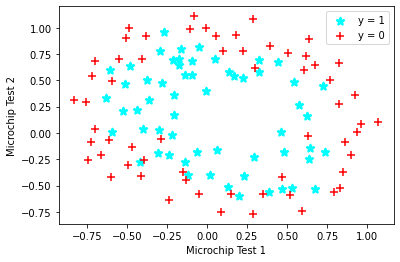

In [221]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [222]:
n = data.shape[1]-1
x = data[data.columns[0:n]]
y = data[data.columns[n:n+1]]

X = x.values
y = y.values

In [223]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [224]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [225]:
from scipy.special import expit 
def h(mytheta,myX): 
    return expit(np.dot(myX,mytheta))

In [226]:
def computeCost(mytheta,myX,myY,mylambda = 0.): 
    m = myY.size 
    term1 = np.dot(-np.array(myY).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myY)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:]))
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [227]:
def sigmoid(x):
    x = np.clip( x, -500, 500 )
    result = 1.0/(1.0+np.exp(-x))
    return result

In [228]:
def gradient_logistic(X, Y, mytheta):
  row, column = X.shape
  cost = np.zeros((column,))

  for i in range(row):
    prediction = sigmoid(np.dot(X[i], mytheta))                           
    error  = prediction  - Y[i]                       
    for j in range(column):
      cost[j] = cost[j] + error * X[i,j]        
  cost = cost/row                                   
      
  return cost

In [229]:
from scipy import optimize
initial_theta = np.zeros(XX.shape[1])

def optimizeRegularizedTheta(mytheta, myX, myY, alpha, maxiteration, mylambda=0.):
  m = myX.shape[0]
  cost_history = []
  thetas = copy.deepcopy(mytheta)

  for i in range(maxiteration):
    result = gradient_logistic(myX, myY, thetas)   
    thetas = thetas*(1-alpha*(mylambda/m)) - alpha * result                 
    cost_history.append( computeCost(thetas, myX, myY, mylambda) )

  return thetas, min(cost_history)

theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta)
print(mincost)


[ 0.21980259 -0.03949318  0.17680958 -0.36647819 -0.10509445 -0.18188768
 -0.07526844 -0.04859032 -0.06204244 -0.0630484  -0.29070407 -0.01424949
 -0.09812425 -0.02868105 -0.21291026 -0.10894424 -0.03235489 -0.0221189
 -0.04117423 -0.03887996 -0.13599942 -0.22239972 -0.00401091 -0.05049457
 -0.00193417 -0.05373719 -0.01313744 -0.20704175 -0.11727771 -0.01970546
 -0.01576503 -0.01737718 -0.0100774  -0.03114817 -0.02231062 -0.16341925
 -0.17743324 -0.00273491 -0.0285809  -0.00091388 -0.02164516 -0.00046305
 -0.03550264 -0.00697696 -0.20089995 -0.11597428 -0.01352922 -0.01166042
 -0.0076277  -0.00606408 -0.01104921 -0.00418937 -0.02457545 -0.01282876
 -0.17800224 -0.14871731 -0.00350006 -0.0176873  -0.00056508 -0.01011747
 -0.00079118 -0.01210025  0.00038697 -0.02633894 -0.00410926 -0.20035957]
0.6089396397803091


In [230]:
def plotBoundary(mytheta, X, Y, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,X,Y,0.1,1000,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])

    myfmt = { 0:'lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=14, fmt=myfmt)
    plt.title("Decision Boundary")

[ 1.26417001e+00  7.35785885e-01  1.34575328e+00 -2.05425981e+00
 -9.41669252e-01 -1.20175477e+00  2.36484563e-01 -4.14345656e-01
 -4.16023101e-01 -1.18983482e-02 -1.50604511e+00 -8.73088139e-02
 -6.65501535e-01 -2.97257007e-01 -1.06321371e+00 -1.61310274e-01
 -2.42833027e-01 -7.79800864e-02 -2.93290541e-01 -3.33313239e-01
 -3.29543875e-01 -1.06496165e+00  5.95148218e-03 -3.24248588e-01
 -5.39771789e-03 -3.48586876e-01 -1.63715987e-01 -8.23557181e-01
 -3.06198193e-01 -1.24851523e-01 -5.83636352e-02 -1.27239389e-01
 -5.16787175e-02 -1.85022617e-01 -2.23006646e-01 -4.04024311e-01
 -7.79282173e-01  1.89835570e-02 -1.73872565e-01  3.56166116e-03
 -1.41519603e-01  1.15972201e-03 -2.05696985e-01 -1.09103872e-01
 -6.53303972e-01 -3.41124101e-01 -6.76487518e-02 -4.69828729e-02
 -5.38762103e-02 -2.75431258e-02 -7.21588493e-02 -2.43917876e-02
 -1.22763466e-01 -1.49737233e-01 -4.15713881e-01 -5.93250571e-01
  1.49229807e-02 -1.02432655e-01  3.34685185e-03 -6.41146049e-02
  7.96918805e-05 -7.52361

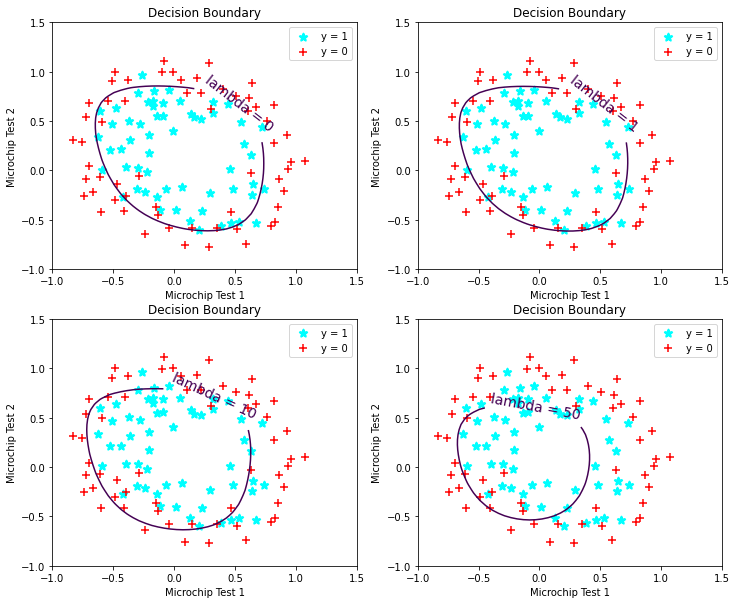

In [231]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)